Question 1

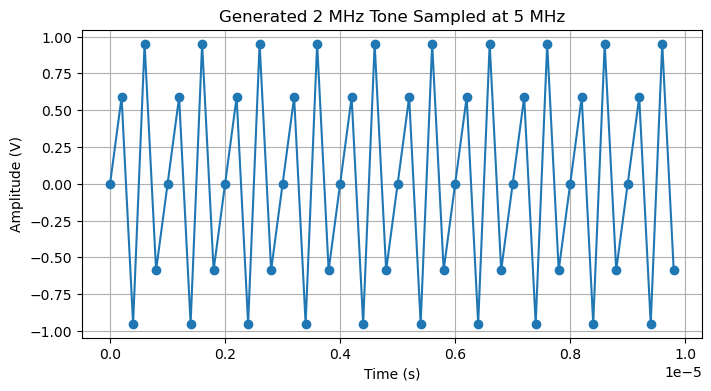

In [6]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

F1 = 2e6
Fs = 5e6
T = 0.001
t = np.arange(0, T, 1/Fs)

x_t = np.sin(F1*2*np.pi*t)

plt.figure(figsize=(8,4))
plt.plot(t[:50], x_t[:50], marker='o')  #plot 50 samples
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.title("Generated 2 MHz Tone Sampled at 5 MHz")
plt.grid()
plt.show()


Question 1.a

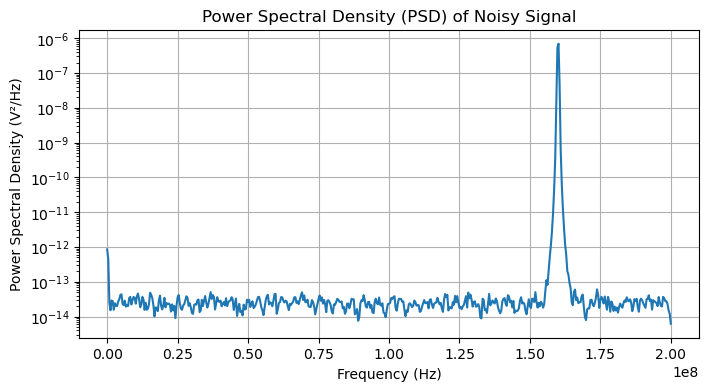

Gaussian noise variance: 5.000000e-06
Uniform noise parameter a: 3.872983e-03


In [114]:
from scipy.signal import welch, get_window

SNR_dB = 50
P_signal = (1**2) / 2
sigma2_gaussian = P_signal / (10**(SNR_dB / 10))
sigma_gaussian = np.sqrt(sigma2_gaussian)

#generate Gaussian noise
noise_gaussian = np.random.normal(0, sigma_gaussian, len(t))

#noisy signal
x_noisy = x_t + noise_gaussian

#compute PSD
f, PSD = welch(x_noisy, Fs, nperseg=1024)

# Plot the PSD
plt.figure(figsize=(8, 4))
plt.semilogy(f, PSD)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (V²/Hz)")
plt.title("Power Spectral Density (PSD) of Noisy Signal")
plt.grid()
plt.show()

sigma2_uniform = sigma2_gaussian
a_uniform = np.sqrt(3 * sigma2_uniform)

print(f"Gaussian noise variance: {sigma2_gaussian:.6e}")
print(f"Uniform noise parameter a: {a_uniform:.6e}")

Question 1.b

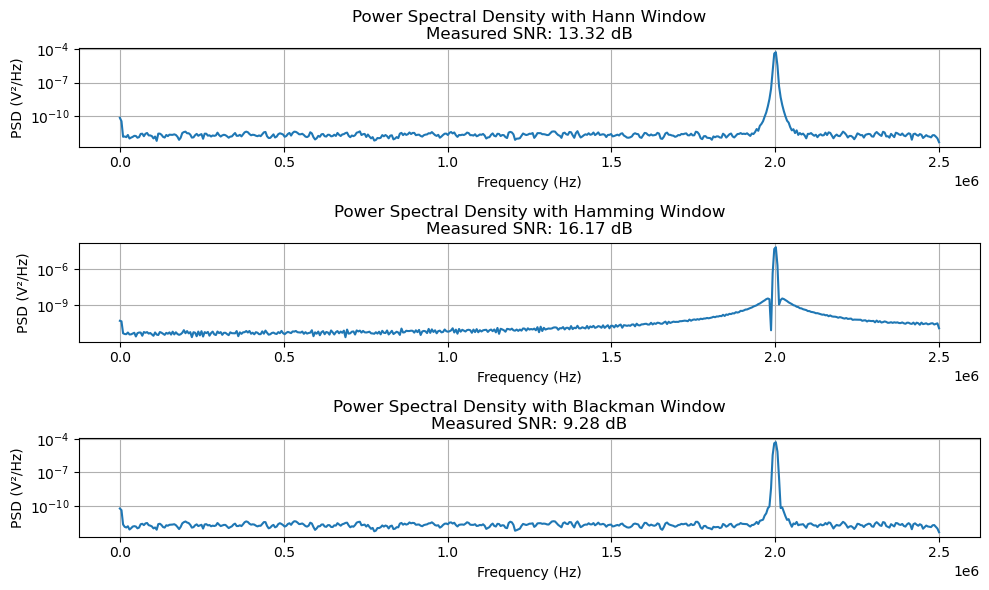

In [12]:
window_types = ["hann", "hamming", "blackman"]
nperseg = 1024

plt.figure(figsize=(10, 6))

for i, win_type in enumerate(window_types):
    #create window
    window = get_window(win_type, nperseg)
    
    K = 1/np.mean(window**2)
    
    #compute PSD with windowing
    f, PSD = welch(x_noisy, Fs, window=window, nperseg=nperseg)
    
    #compute SNR from PSD
    P_signal_estimated = np.sum(PSD[(f >= F1-Fs/nperseg) & (f <= F1+Fs/nperseg)])
    P_noise_estimated = np.sum(PSD[(f > F1+Fs/nperseg) | (f < F1-Fs/nperseg)])
    
    SNR = 10 * np.log10(P_signal_estimated/P_noise_estimated)
    
    #plot PSD
    plt.subplot(3, 1, i+1)
    plt.semilogy(f, PSD)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("PSD (V²/Hz)")
    plt.title(f"Power Spectral Density with {win_type.capitalize()} Window\nMeasured SNR: {SNR:.2f} dB")
    plt.grid()

plt.tight_layout()
plt.show()

Question 2.a

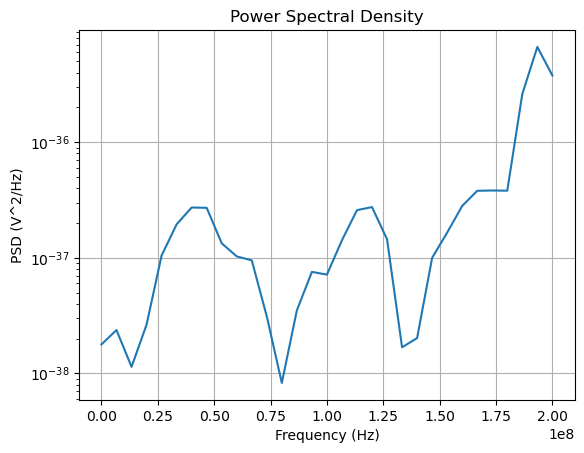

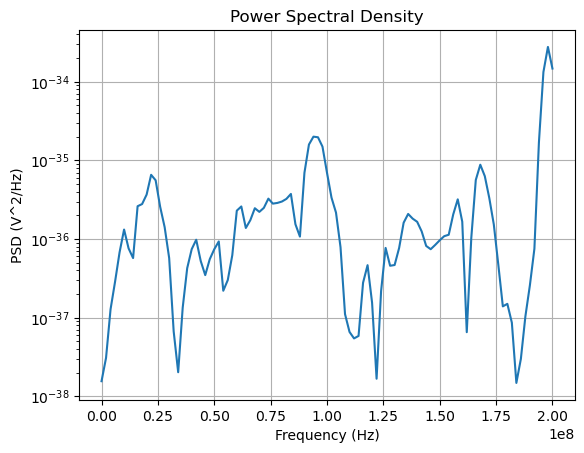

31.15790075547207
30.760216677020267


In [79]:
def quantize(signal_in, bits):
    levels = 2**bits
    max_val = np.max(np.abs(signal_in))
    quantized = np.round(signal_in / max_val * (levels / 2 - 1)) / (levels / 2 - 1) * max_val
    return quantized

def generate_and_quantize_sinewave(frequency, amplitude, sampling_rate, bits, periods):
    time = np.arange(0, periods / frequency, 1 / sampling_rate)
    signal_in = amplitude * np.sin(2 * np.pi * frequency * time)
    quantized_signal = quantize(signal_in, bits)
    return time, quantized_signal

def plot_psd(signal_in, sampling_rate):
    frequencies, psd = welch(signal_in, sampling_rate, window='flattop', nperseg=len(signal_in), scaling='density')
    plt.figure()
    plt.semilogy(frequencies, psd)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (V^2/Hz)')
    plt.title('Power Spectral Density')
    plt.grid(True)
    plt.show()
    
def calculate_snr(signal_in, quantized_signal):
    noise = quantized_signal - signal_in
    p_signal = np.mean(signal_in**2)
    p_noise = np.mean(noise**2)
    snr = 10 * np.log10(p_signal / p_noise)
    return snr
    
# Parameters
F1 = 200e6
amplitude = 1.0
Fs = 400e6
N = 6
periods = [30, 100]

t1 = np.arange(0, periods[0] / F1, 1 / Fs)
t2 = np.arange(0, periods[1] / F1, 1 / Fs)
x1_t = amplitude * np.sin(2 * np.pi * F1 * t1)
x2_t = amplitude * np.sin(2 * np.pi * F1 * t2)

#quantize signals
x1_q = quantize(x1_t, N)
x2_q = quantize(x2_t, N)

#Plot PSD
plot_psd(x1_q, Fs) #30 periods
plot_psd(x2_q, Fs) #100 periods

print(calculate_snr(x1_t, x1_q))
print(calculate_snr(x2_t, x2_q))

Question 2.b

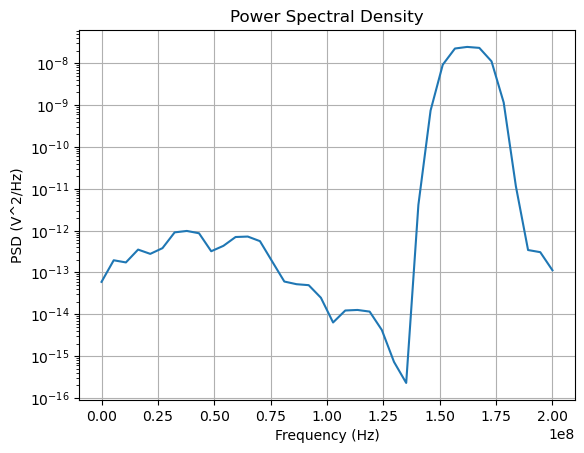

39.69704330672666


In [81]:
C = 13
M = 32
inc_Fs = M/C*F1

t1 = np.arange(0, periods[0] / F1, 1 / inc_Fs)
x1_t = amplitude * np.sin(2 * np.pi * F1 * t1)

#quantize signals
x1_q = quantize(x1_t, N)

#Plot PSD
plot_psd(x1_q, Fs) #30 periods

#calculate SNR
print(calculate_snr(x1_t, x1_q))

Question 2.c

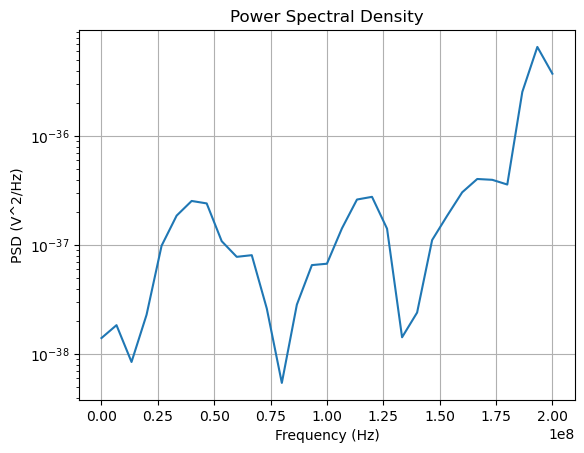

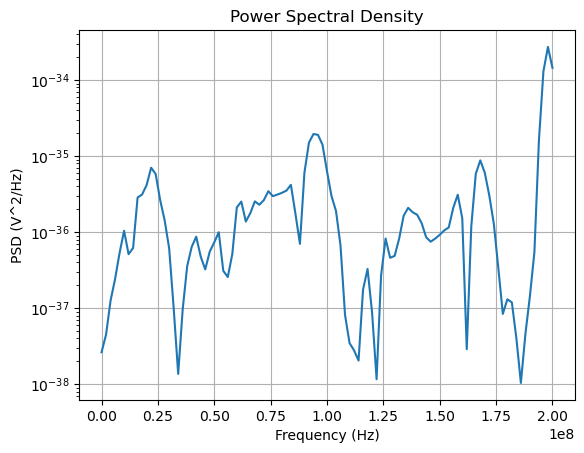

67.68104760530524
67.00266033340279


In [83]:
# Parameters
F1 = 200e6
amplitude = 1.0
Fs = 400e6
N = 12
periods = [30, 100]

t1 = np.arange(0, periods[0] / F1, 1 / Fs)
t2 = np.arange(0, periods[1] / F1, 1 / Fs)
x1_t = amplitude * np.sin(2 * np.pi * F1 * t1)
x2_t = amplitude * np.sin(2 * np.pi * F1 * t2)

#quantize signals
x1_q = quantize(x1_t, N)
x2_q = quantize(x2_t, N)

#Plot PSD
plot_psd(x1_q, Fs) #30 periods
plot_psd(x2_q, Fs) #100 periods

print(calculate_snr(x1_t, x1_q))
print(calculate_snr(x2_t, x2_q))

Question 2.d

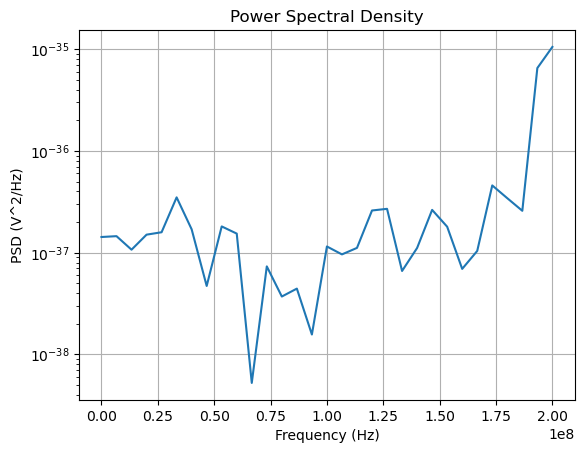

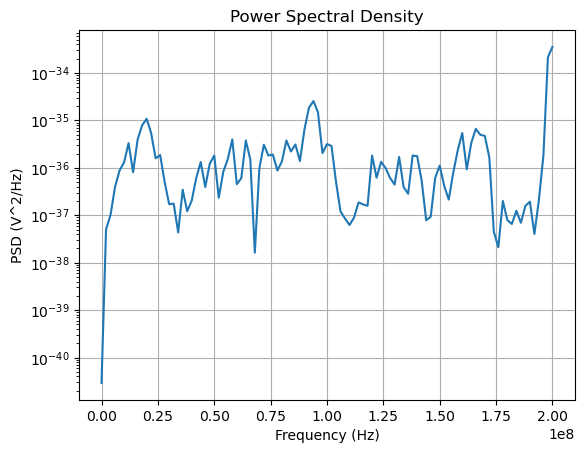

67.68104760530524
67.00266033340279


In [85]:
def plot_psd(signal_in, sampling_rate):
    frequencies, psd = welch(signal_in, sampling_rate, window='hann', nperseg=len(signal_in), scaling='density')
    plt.figure()
    plt.semilogy(frequencies, psd)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (V^2/Hz)')
    plt.title('Power Spectral Density')
    plt.grid(True)
    plt.show()

#quantize signals
x1_q = quantize(x1_t, N)
x2_q = quantize(x2_t, N)

#Plot PSD
plot_psd(x1_q, Fs) #30 periods
plot_psd(x2_q, Fs) #100 periods

print(calculate_snr(x1_t, x1_q))
print(calculate_snr(x2_t, x2_q))

Question 2.e

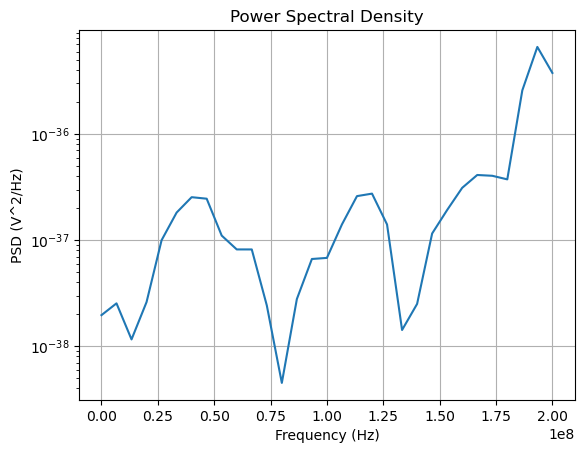

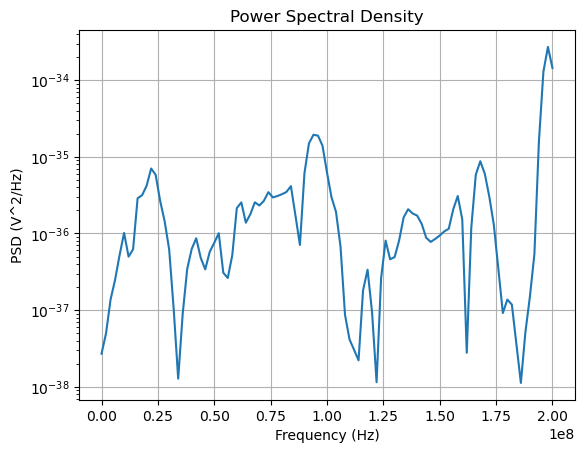

36.47434006048292
66.7002308387181


In [109]:
def plot_psd(signal_in, sampling_rate):
    frequencies, psd = welch(signal_in, sampling_rate, window='flattop', nperseg=len(signal_in), scaling='density')
    plt.figure()
    plt.semilogy(frequencies, psd)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (V^2/Hz)')
    plt.title('Power Spectral Density')
    plt.grid(True)
    plt.show()

# Parameters
F1 = 200e6
amplitude = 1.0
Fs = 400e6
N = 12
periods = [30, 100]

t1 = np.arange(0, periods[0] / F1, 1 / Fs)
t2 = np.arange(0, periods[1] / F1, 1 / Fs)
x1_t = amplitude * np.sin(2 * np.pi * F1 * t1)
x2_t = amplitude * np.sin(2 * np.pi * F1 * t2)

P_signal = np.mean(x1_t**2)
P_noise = P_signal / (10**(38 / 10))
noise = np.sqrt(P_noise) * np.random.randn(len(x1_t))

x1_t += noise

P_signal = np.mean(x2_t**2)
noise = np.sqrt(P_noise) * np.random.randn(len(x2_t))
x2_t += noise

#quantize signals
x1_q = quantize(x1_t, N)
x2_q = quantize(x2_t, N)

P_signal = np.mean(x1_q**2)
P_noise = P_signal / (10**(38 / 10))
noise = np.sqrt(P_noise) * np.random.randn(len(x1_q))

x1_q += noise

#Plot PSD
plot_psd(x1_q, Fs) #30 periods
plot_psd(x2_q, Fs) #100 periods

print(calculate_snr(x1_t, x1_q))
print(calculate_snr(x2_t, x2_q))

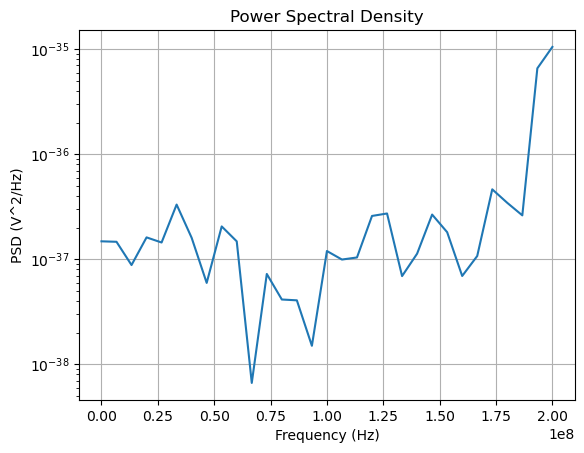

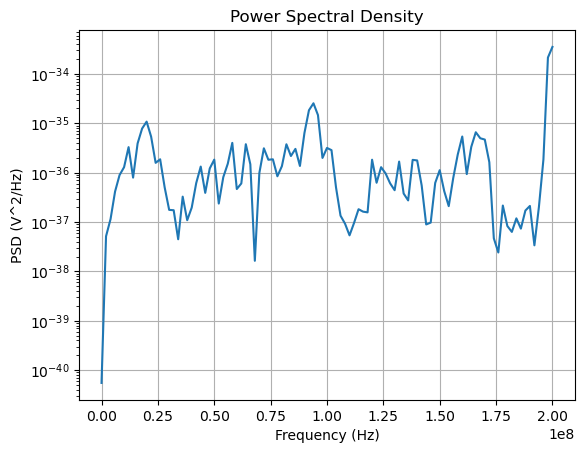

36.47434006048292
66.7002308387181


In [111]:
def plot_psd(signal_in, sampling_rate):
    frequencies, psd = welch(signal_in, sampling_rate, window='hann', nperseg=len(signal_in), scaling='density')
    plt.figure()
    plt.semilogy(frequencies, psd)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (V^2/Hz)')
    plt.title('Power Spectral Density')
    plt.grid(True)
    plt.show()

#Plot PSD
plot_psd(x1_q, Fs) #30 periods
plot_psd(x2_q, Fs) #100 periods

print(calculate_snr(x1_t, x1_q))
print(calculate_snr(x2_t, x2_q))

The SNR differs drastically for the different periods. From the plots we can see that the SNR for the signal with the longer period is not close to the targetted 38dB SNR.